# Predict weight base on height

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Height-Weight Data.csv')

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
Height    3501 non-null float64
Weight    3501 non-null float64
dtypes: float64(2)
memory usage: 54.8 KB


In [6]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


Text(0.5, 1.0, 'Prediction Table')

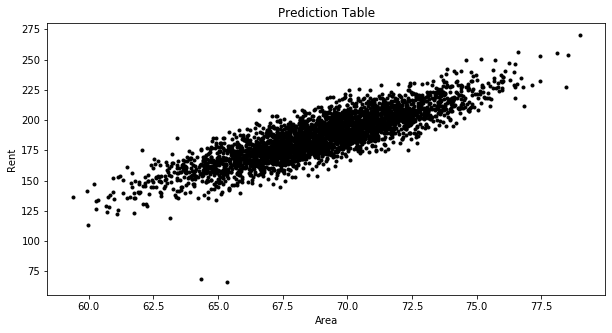

In [62]:
plt.figure(figsize=(10,5))
plt.scatter(df['Height'], df['Weight'], color='black', marker='.')
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Prediction Table")

In [15]:
df.Height.mean()

69.02441087268797

In [16]:
df.Weight.mean()

186.89125797946284

In [17]:
df.shape

(3501, 2)

# Spliting data set in X and Y

In [20]:
x = df[['Height']] #independent variables, x must be 2D array so we use double bracket
#or we can drop rent and get the data into X
#x = df.drop('rent', axis=1)
y = df['Weight'] #dependent variable

# Split the dataset

In [21]:
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [23]:
from sklearn.model_selection import train_test_split as tts

In [26]:
xtrain, xtest, ytrain, ytest = tts(x,y, train_size=.70) #or train_size = 0.3
#xtrain, xtest, ytrain, ytest = tts(x,y, test_size=.3, random_state = 42) #we use random state for using the smae data

In [32]:
xtest.shape


(1051, 1)

In [33]:
xtrain.shape

(2450, 1)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression() # crating object for linear model

In [37]:
lr.fit(xtrain, ytrain) #train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
xtrain.shape

(2450, 1)

In [39]:
lr.coef_

array([5.9925135])

In [40]:
lr.intercept_

-226.85545267236733

In [41]:
m = lr.coef_
c = lr.intercept_

In [43]:
v = 73.847017
y = (m * v) + c

In [44]:
y

array([215.67379335])

In [45]:
lr.predict([[73.847017]])

array([215.67379335])

In [46]:
lr.predict(df[['Height']])

array([215.67379347, 185.32103564, 217.25035408, ..., 216.06649565,
       177.01611144, 209.03380675])

In [49]:
df['Predicted Weight'] = lr.predict(df[['Height']])

In [50]:
df

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.673793
1,68.781904,162.310473,185.321036
2,74.110105,212.740856,217.250354
3,71.730978,220.042470,202.993403
4,69.881796,206.349801,191.912152
5,67.253016,152.212156,176.159152
6,68.785081,183.927889,185.340075
7,68.348516,167.971111,182.723949
8,67.018950,175.929440,174.756508
9,63.456494,156.399676,153.408444


# Finding Testing Error

In [51]:
from sklearn.metrics import mean_squared_error as ms
pred = lr.predict(xtest)
mse = ms(ytest, pred)

In [55]:
mse

113.62016228096986

In [54]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, pred)
mae

8.21723623766954

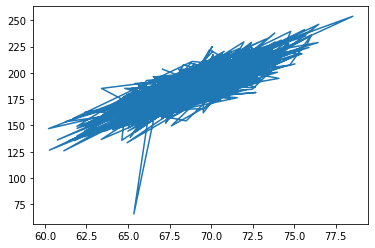

In [56]:
plt.plot(xtest, ytest)

# Best fit line

Text(0.5, 1.0, 'Prediction table')

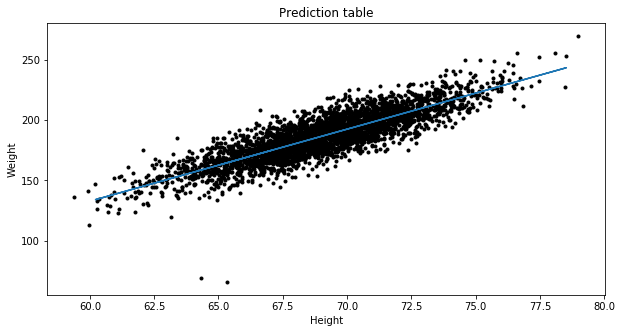

In [58]:
plt.figure(figsize=(10,5))
plt.plot(xtest, lr.predict(xtest))
plt.scatter(df['Height'], df['Weight'], color='black', marker='.')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Prediction table")

In [60]:
lr.score(xtest, ytest) # squard value

0.7006572076108056

In [61]:
lr.score(xtrain, ytrain)

0.7450690841579842